<a href="https://colab.research.google.com/github/chacha86/pythonai2/blob/main/%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC_%ED%9A%8C%EA%B7%80_%EB%B0%8F_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fish = pd.read_csv('/content/Fish.csv')

In [ ]:
# 분류
## 이진분류
## 특성 -> 2개만(Length1, Weight)

bream_perch = fish[(fish['Species'] == 'Bream') | (fish['Species'] == 'Perch')]

bream_perch_data = bream_perch[['Length1', 'Weight']]
bream_perch_target = bream_perch['Species']
bream_perch_data
bream_perch_target

from sklearn.model_selection import train_test_split

trd, tsd, trt, tst = train_test_split(bream_perch_data, bream_perch_target, train_size=0.8, stratify = bream_perch_target, random_state=42)

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=2)
dtc.fit(trd, trt)


DecisionTreeClassifier(max_depth=2)

In [ ]:
dtc.score(trd, trt), dtc.score(tsd, tst)

(0.8888888888888888, 0.8947368421052632)

In [ ]:
trd

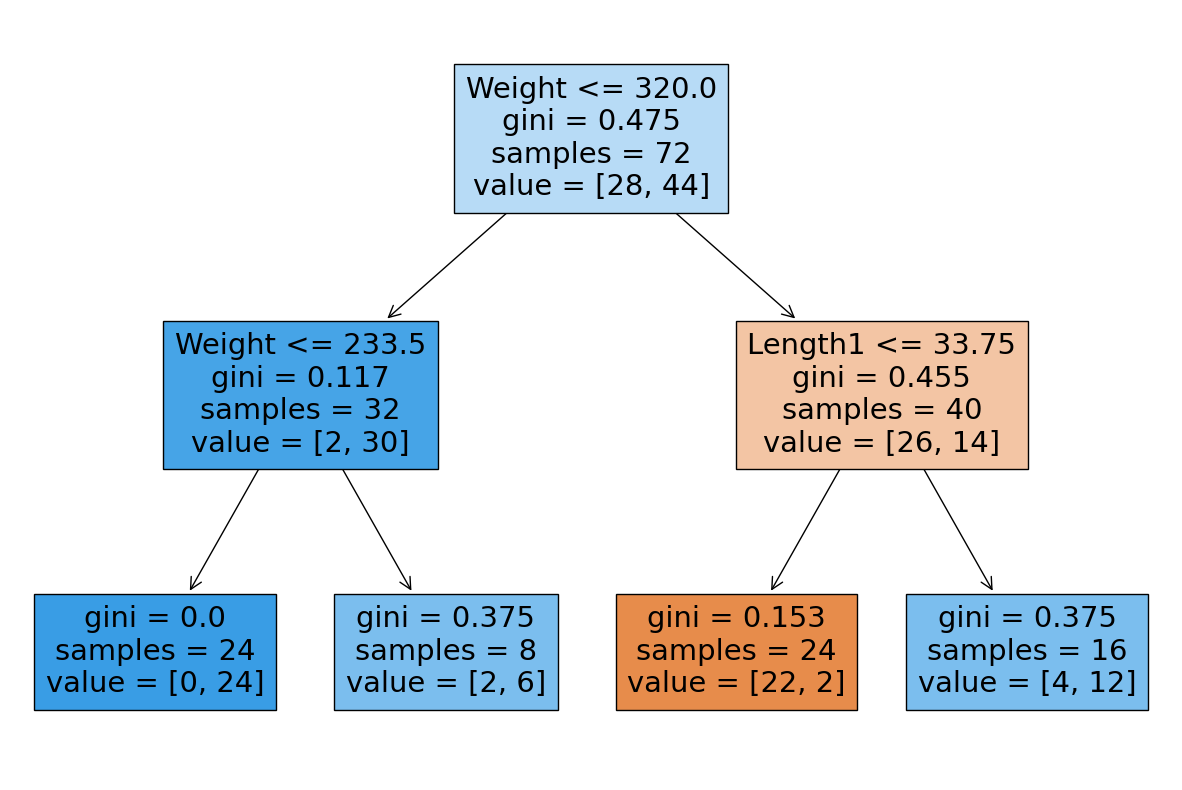

In [ ]:
## 트리 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(dtc, filled=True, feature_names=trd.columns)
plt.show()


In [ ]:
## root 노드
## Weight <= 320
## Weight -> 결정 변수,  320 -> 결정값(threshold)
## gini -> 불순도(0에 가까울 수록 좋음)
## sample -> 해당 노드에 포함되는 샘플(데이터) 개수
## value -> 클래스별 개수
## Weight가 320이 나온 이유 -> 모델 따져봤을 때 가장 좋은 분할 값이더라.




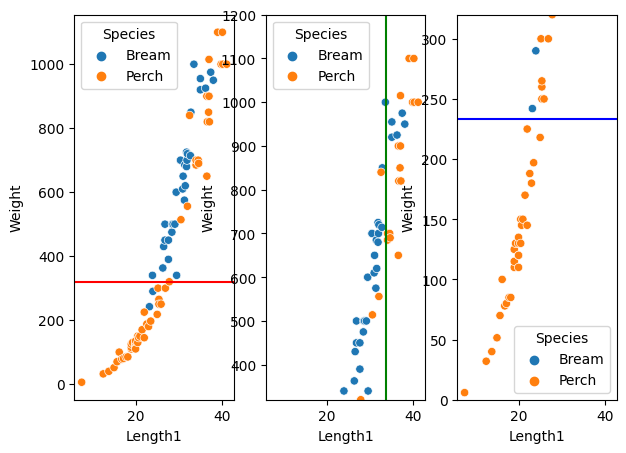

In [ ]:
## 산점도 물고기 분포 시각화

## root -> weight <= 320
## depth1 -> Weight <= 233.5,   Length1 <= 33.75

fig, ax = plt.subplots(1, 3, figsize=(7, 5))

sns.scatterplot(data=bream_perch, x='Length1', y='Weight', hue='Species', ax = ax[0])
ax[0].axhline(y=320, color='r')

sns.scatterplot(data=bream_perch, x='Length1', y='Weight', hue='Species', ax = ax[1])
ax[1].set_ylim(320, 1200)
ax[1].axvline(x=33.75, color='g')

sns.scatterplot(data=bream_perch, x='Length1', y='Weight', hue='Species', ax = ax[2])
ax[2].set_ylim(0, 320)
ax[2].axhline(y=233.5, color='b')

In [ ]:
sns.scatterplot(data=bream_perch, x='Length1', y='Weight', hue='Species')
plt.axvline(x=33.75, color='g')
plt.axhline(y=320, color='r')


In [ ]:
## 결정 트리 회귀

## perch의 길이로 무게 예측

perch = fish[fish['Species'] == 'Perch']

perch_data = perch[['Length1']]
perch_target = perch['Weight']

perch_data
perch_target


trd, tsd, trt, tst = train_test_split(perch_data, perch_target, train_size=0.8, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=2)

dtr.fit(trd, trt)
dtr.score(trd, trt), dtr.score(tsd, tst)


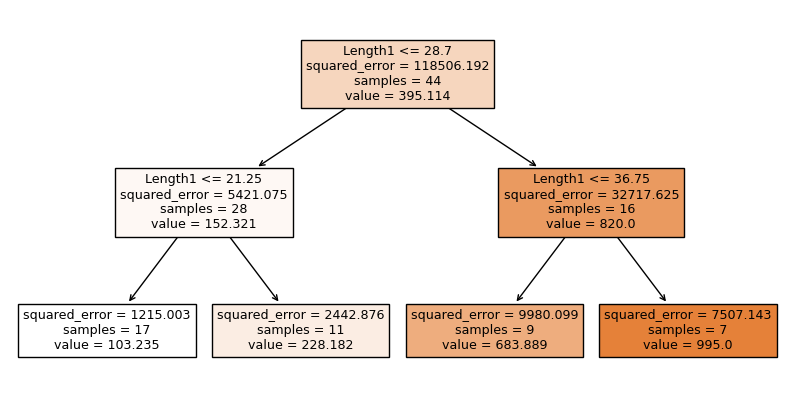

In [ ]:
plt.figure(figsize=(10, 5))
plot_tree(dtr, filled=True, feature_names=['Length1'])
plt.show()

In [ ]:
## Length1 -> 결정 변수, 임계값 : 28.7
## squared_error 최소값이 되는 임계값을 찾음
## value -> 임계값의 y값

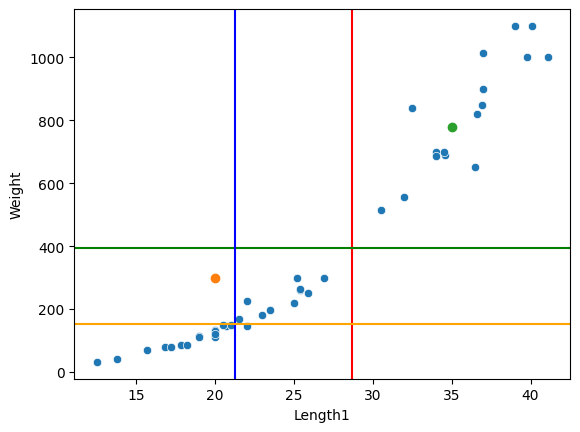

In [ ]:
sns.scatterplot(x=trd['Length1'], y=trt)
plt.axvline(x=28.7, color='red')
plt.axhline(y=395.114, color='green')
plt.axvline(x=21.25, color='blue')
plt.axhline(y=152.321, color='orange')

plt.scatter(x=20, y=300)
plt.scatter(x=35, y=780)